In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_excel("C://Users//ShahinN//Desktop//Final_Carvana.xlsx")
data.head()

,IsBadBuy,VehicleAge,vehicleage (categorical),Transmission,VehOdo,A,B,C,D,E,...,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,PRIMEUNIT_NO,PRIMEUNIT_YES
0,1,5,1,1,75745,3590,5156,4377,6068,3416,...,0,0,0,0,0,0,0,1,0,0
1,1,3,0,1,81478,8535,10745,12671,14979,8278,...,0,0,0,0,0,1,0,0,0,0
2,1,6,1,1,92037,2988,4268,5860,7193,2867,...,0,0,0,0,0,0,1,0,0,0
3,1,4,0,1,58251,7060,8234,10226,11416,7060,...,0,0,0,0,0,0,1,0,0,0
4,1,8,1,1,57346,3202,4126,6054,7284,3068,...,0,0,0,0,0,0,1,0,0,0


#### میتونید از data.columns برای دیدن اسامی فیچرها زمانی که تعدادشون زیاده استفاده کنید

In [6]:
# PCA part
data2= data[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I' , 'IsBadBuy']]

In [7]:
data2.head()

,A,B,C,D,E,F,G,H,I,IsBadBuy
0,3590,5156,4377,6068,3416,4413,4189,5266,4100,1
1,8535,10745,12671,14979,8278,10279,12507,14280,7150,1
2,2988,4268,5860,7193,2867,4040,5830,8216,4245,1
3,7060,8234,10226,11416,7060,8234,10226,11416,7215,1
4,3202,4126,6054,7284,3068,4058,5912,7309,6500,1


In [8]:
data2.corr()

,A,B,C,D,E,F,G,H,I,IsBadBuy
A,1.000000,0.991736,0.916946,0.916073,0.951370,0.945701,0.885515,0.884933,0.809040,-0.159563
B,0.991736,1.000000,0.910958,0.923586,0.939297,0.946053,0.875919,0.885316,0.800758,-0.149647
C,0.916946,0.910958,1.000000,0.991100,0.868687,0.865795,0.928436,0.922094,0.765253,-0.127687
D,0.916073,0.923586,0.991100,1.000000,0.863873,0.870922,0.918340,0.921944,0.762836,-0.121706
E,0.951370,0.939297,0.868687,0.863873,1.000000,0.991556,0.920920,0.919074,0.803921,-0.158305
F,0.945701,0.946053,0.865795,0.870922,0.991556,1.000000,0.915049,0.926966,0.799172,-0.150499
G,0.885515,0.875919,0.928436,0.918340,0.920920,0.915049,1.000000,0.990778,0.775482,-0.151204
H,0.884933,0.885316,0.922094,0.921944,0.919074,0.926966,0.990778,1.000000,0.775135,-0.145497
I,0.809040,0.800758,0.765253,0.762836,0.803921,0.799172,0.775482,0.775135,1.000000,-0.134672
IsBadBuy,-0.159563,-0.149647,-0.127687,-0.121706,-0.158305,-0.150499,-0.151204,-0.145497,-0.134672,1.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

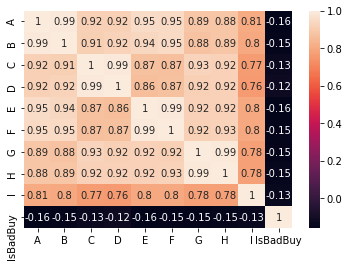

In [11]:
sns.heatmap(data2.corr(), annot= True)

In [13]:
X = data2.values[:, 0:9]
Y= data2.values[:, 9]

In [14]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [16]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(X)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
PCA = pca.fit_transform(x)

In [22]:
data3 = pd.DataFrame(PCA, columns = ['MMR'])
data3.head()

             

,MMR
0,-3.154862
1,3.491364
2,-2.711611
3,1.474203
4,-2.374160


In [23]:
data_final = data.join(data3)

In [24]:
data_final

,IsBadBuy,VehicleAge,vehicleage (categorical),Transmission,VehOdo,A,B,C,D,E,...,Size_SPORTS,Size_VAN,TopThreeAmericanName_,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,PRIMEUNIT_NO,PRIMEUNIT_YES,MMR
0,1,5,1,1,75745,3590,5156,4377,6068,3416,...,0,0,0,0,0,0,1,0,0,-3.154862
1,1,3,0,1,81478,8535,10745,12671,14979,8278,...,0,0,0,0,1,0,0,0,0,3.491364
2,1,6,1,1,92037,2988,4268,5860,7193,2867,...,0,0,0,0,0,1,0,0,0,-2.711611
3,1,4,0,1,58251,7060,8234,10226,11416,7060,...,0,0,0,0,0,1,0,0,0,1.474203
4,1,8,1,1,57346,3202,4126,6054,7284,3068,...,0,0,0,0,0,1,0,0,0,-2.374160
5,1,6,1,1,73154,3276,4422,4038,5276,3242,...,0,0,0,0,0,1,0,0,0,-3.357461
6,1,6,1,1,94499,2261,3173,4379,6566,2691,...,0,0,0,0,0,1,0,1,0,-3.393417
7,1,7,1,1,99168,2007,2790,4625,5489,1827,...,0,0,0,0,1,0,0,0,0,-4.103695
8,1,3,0,1,66783,6582,7550,7609,8654,7178,...,0,0,0,0,0,0,1,0,0,1.179800
9,1,5,1,1,64895,5082,6076,5989,7062,5591,...,1,0,0,0,1,0,0,0,0,-1.120212


In [27]:
data_final.drop(['VehicleAge', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'], axis= 1, inplace=True)

In [30]:
data_final

,IsBadBuy,vehicleage (categorical),Transmission,VehOdo,IsOnlineSale,WarrantyCost,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,...,Size_SPORTS,Size_VAN,TopThreeAmericanName_,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,PRIMEUNIT_NO,PRIMEUNIT_YES,MMR
0,1,1,1,75745,0,803,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-3.154862
1,1,0,1,81478,0,1633,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3.491364
2,1,1,1,92037,0,2639,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-2.711611
3,1,0,1,58251,0,837,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1.474203
4,1,1,1,57346,0,1800,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-2.374160
5,1,1,1,73154,0,2274,0,1,0,0,...,0,0,0,0,0,1,0,0,0,-3.357461
6,1,1,1,94499,0,1341,0,0,0,1,...,0,0,0,0,0,1,0,1,0,-3.393417
7,1,1,1,99168,0,1641,0,0,0,0,...,0,0,0,0,1,0,0,0,0,-4.103695
8,1,0,1,66783,0,728,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.179800
9,1,1,1,64895,0,728,0,0,0,0,...,1,0,0,0,1,0,0,0,0,-1.120212


In [35]:
data_final.to_csv("C://Users//ShahinN//Desktop//Carvana_final.csv")